In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
iata_codes = ["MAD", "BCN", "AGP"]

searches_path = "/home/dsc/data/challenge/searches.csv.bz2"

In [20]:
df_filter = pd.DataFrame()
chunksize = 1000000 #10⁵

reader =  pd.read_csv(
    searches_path, 
    compression = "bz2", 
    sep = "^", 
    memory_map = True, 
    error_bad_lines = False,
    usecols=["Date","Destination"],
    chunksize=chunksize
)

In [21]:
for chunk in reader:      
    curr = chunk[chunk["Destination"].isin(iata_codes)]
    if df_filter.empty:
        df_filter = curr
    else:
        df_filter = pd.concat([df_filter, curr])

In [32]:
df_filter["year"] = pd.DatetimeIndex(df_filter["Date"]).year
df_filter["month"] = pd.DatetimeIndex(df_filter["Date"]).month
df_filter = df_filter.drop(["Date"], axis=1)

In [47]:
df_filter["year"].unique()

array([2013])

In [78]:
#como solo hay un año puedo hacer lo siguiente:
result = df_filter.groupby(by=["Destination", "month"]).count()

In [84]:
result = result.reset_index()
result = result.rename(columns={'year': 'count'})
result.head()

,Destination,month,count
0,AGP,1,9633
1,AGP,2,8379
2,AGP,3,10659
3,AGP,4,8265
4,AGP,5,10830


<AxesSubplot:xlabel='month', ylabel='count'>

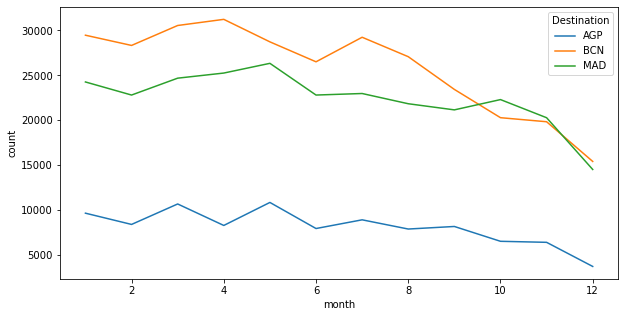

In [85]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=result, x="month", y="count", hue="Destination", ax=ax)